In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ford.csv')  # reading csv file

In [3]:
df.head() # Display 1st 5 rows

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [4]:
df.shape # Display shape of dataframe

(17966, 9)

In [5]:
df.info() # Display Non-Null counts, datatypes and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [6]:
df.describe() # Display the dataframe counts, mean, std,max percentile

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [7]:
df.duplicated().sum() # Display the duplicates data

154

In [8]:
df.drop_duplicates(inplace = True) # Drop duplicate data

In [9]:
df.isnull().sum() # Show the number of Null values

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [10]:
df.columns # Display all columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

**Function used to plot histplot and boxplot**

In [12]:
def plot_dist(column): 
    plt.figure(figsize = (10,7))
    plt.subplot(1,2,1)
    sns.histplot(df[column])
    plt.xticks(rotation = 90)
    plt.title('Histplot')
    plt.subplot(1,2,2)
    sns.boxplot(df[column])
    plt.title('Boxplot')
    plt.show()

**Function used to handle Outliers**

In [14]:
def handle_outlier(dataFrame,column):
    Q1 = dataFrame[column].quantile(0.25)
    Q3 = dataFrame[column].quantile(0.75)
    IQR = Q3-Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    filtered_df = dataFrame[(dataFrame[column]>=lower) & (dataFrame[column]<=upper)]
    return filtered_df

**Analysing 'Price' column**

*Distribution Before handling outlier*

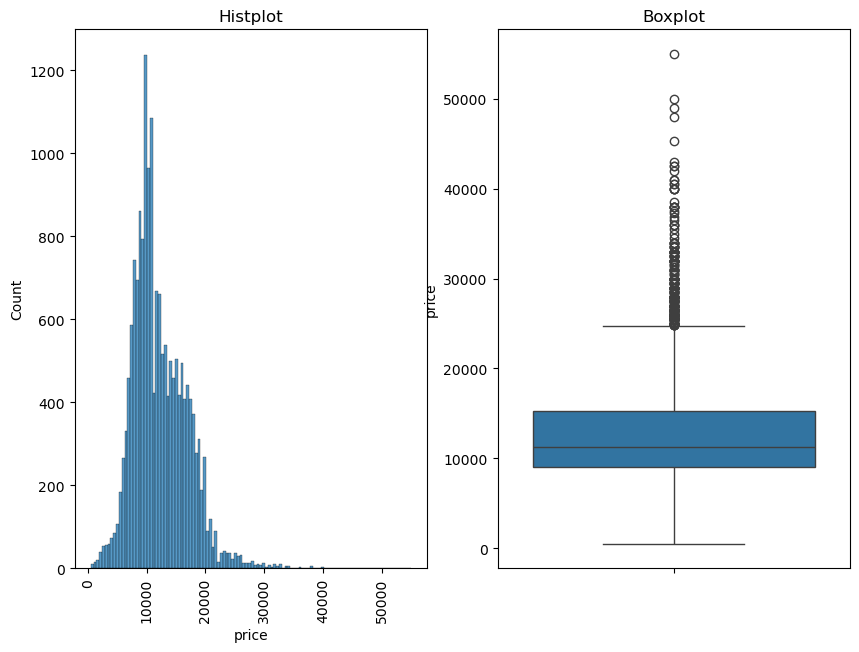

In [17]:
plot_dist('price')

In [18]:
df = handle_outlier(df,'price')  # Handle outlier for 'price' column

*Distribution After handling outlier*

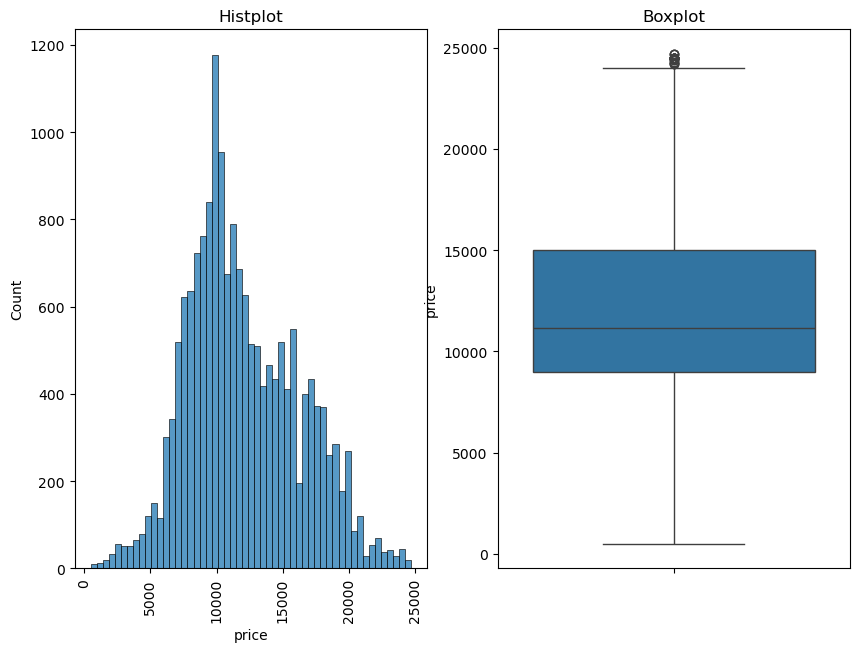

In [20]:
plot_dist('price')

In [21]:
df['price'].skew() # Check skew of the 'price' column

0.39111295799875595

**Analyzing 'Model'  column**

In [23]:
df['model'].value_counts() # Counts for each value

model
 Fiesta                   6508
 Focus                    4481
 Kuga                     2182
 EcoSport                 1127
 C-MAX                     542
 Ka+                       523
 Mondeo                    504
 B-MAX                     350
 S-MAX                     264
 Grand C-MAX               247
 Galaxy                    210
 KA                        197
 Edge                      154
 Puma                       75
 Grand Tourneo Connect      57
 Tourneo Custom             54
 Tourneo Connect            32
 Fusion                     16
 Streetka                    2
 Mustang                     1
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: count, dtype: int64

In [24]:
df['model'].unique() # Display Unique value 

array([' Fiesta', ' Focus', ' Puma', ' EcoSport', ' Kuga', ' C-MAX',
       ' Mondeo', ' Ka+', ' Tourneo Custom', ' S-MAX', ' B-MAX', ' Edge',
       ' Tourneo Connect', ' Grand C-MAX', ' KA', ' Galaxy',
       ' Grand Tourneo Connect', ' Mustang', ' Fusion', ' Ranger',
       ' Streetka', ' Escort', ' Transit Tourneo', 'Focus'], dtype=object)

In [25]:
df['model'] = df['model'].apply(lambda x : x.strip()) # Remove the extra spaces from values

In [26]:
df = df[~(df['model'].isin(['Streetka','Ranger','Escort','Transit Tourneo']))] # Filter dataframe excluding the items

**Analyzing 'Year' column**

In [28]:
df['year'].value_counts() # Counts for each year

year
2017    4835
2018    3943
2019    2974
2016    2305
2015    1355
2014     798
2013     605
2020     215
2012     115
2011      94
2009      91
2010      67
2008      56
2007      32
2005      15
2006      12
2004       4
2002       3
2003       3
1998       1
2000       1
2060       1
Name: count, dtype: int64

In [29]:
df = df[(df['year']<2021) & (df['year']>2005)] # Include data between year 2005 to 2021

In [30]:
df['year'].unique() # Display Unique Values

array([2017, 2018, 2019, 2015, 2014, 2016, 2013, 2020, 2012, 2008, 2010,
       2009, 2011, 2007, 2006], dtype=int64)

In [31]:
# def group_year(value):
#     if value >= 2016:
#         return '2016+'
#     elif value >= 2012:
#         return '2012-2016'
#     elif value >= 2008:
#         return '2008-2012'
#     elif value >= 2004:
#         return '2004-2008'
#     else:
#         return 'below 2004'

In [32]:
# df['group_years'] = df['year'].apply(group_year)

In [33]:
# df['group_years'].value_counts()

**Analyzing 'transmission'  column**

In [35]:
df['transmission'].value_counts() # Counts each value of transmission

transmission
Manual       15224
Automatic     1270
Semi-Auto     1003
Name: count, dtype: int64

**Analyzing 'Mileage' column**

*Plot Before Handling Outliers*

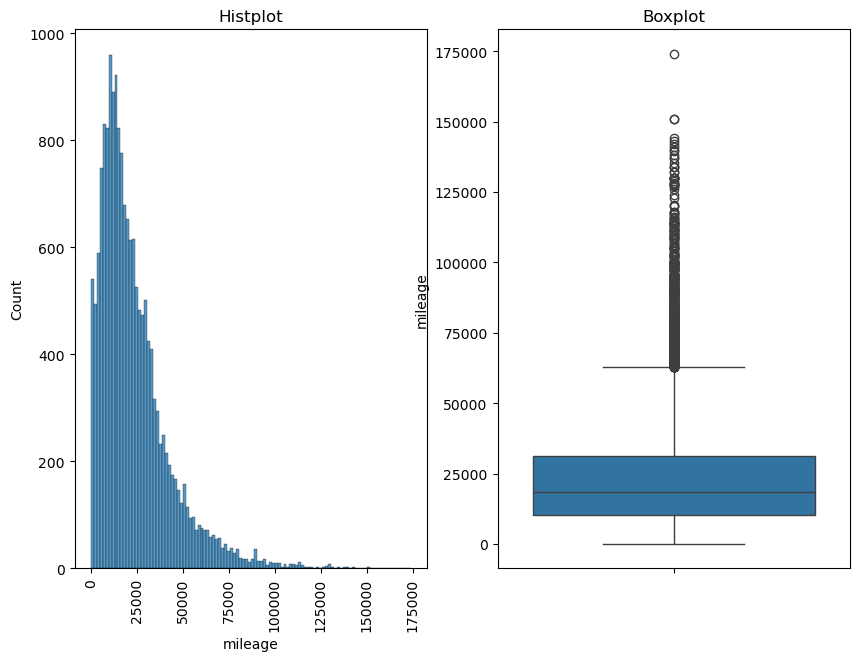

In [38]:
plot_dist('mileage')

In [39]:
df = handle_outlier(df,'mileage') # Handling outlier of 'mileage' column

*Plot After Handling Outliers*

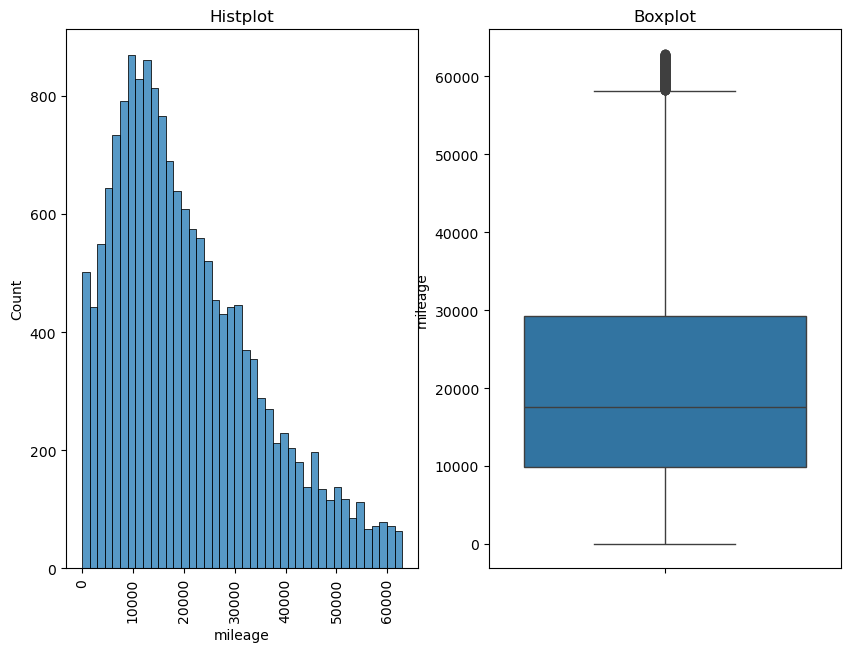

In [41]:
plot_dist('mileage')

In [42]:
df['mileage'].skew() # Checking skew of 'mileage' column

0.8155389253328633

**Analyzing 'fuelType' column**

In [44]:
df['fuelType'].value_counts() # Counts for each value

fuelType
Petrol      11610
Diesel       5039
Hybrid          9
Electric        2
Other           1
Name: count, dtype: int64

In [45]:
df = df[(df['fuelType'].isin(['Petrol','Diesel']))] # Keeps data that have fuel type 'petrol' or 'diesel'

In [46]:
df.head() # Display 1st 5 rows

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [47]:
df.shape # Checking shape of dataframe

(16649, 9)

In [48]:
df.drop(columns = ['tax'],inplace = True) # Droping 'tax' column

**Analyzing 'mpg' (mileage per gallon) column**

Plot before handling outliers*

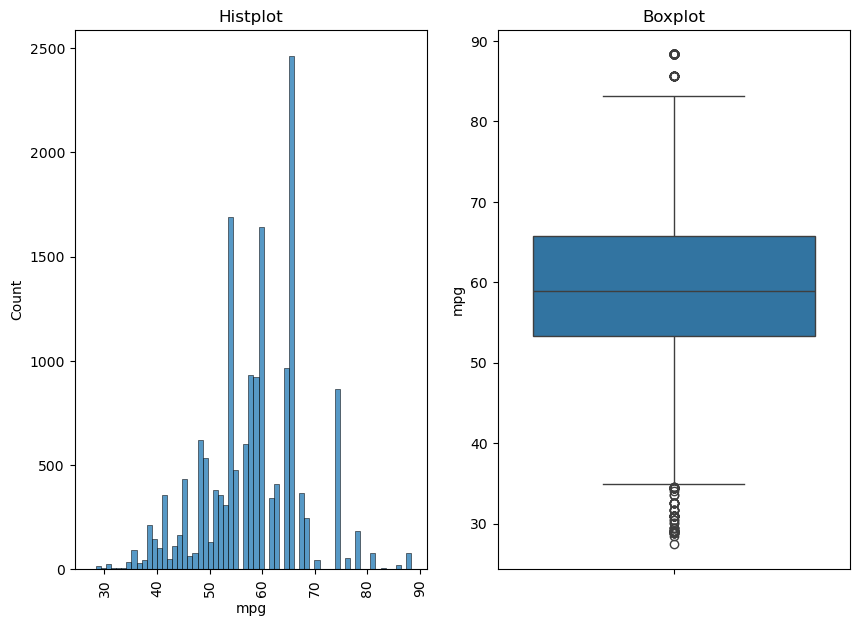

In [51]:
plot_dist('mpg')

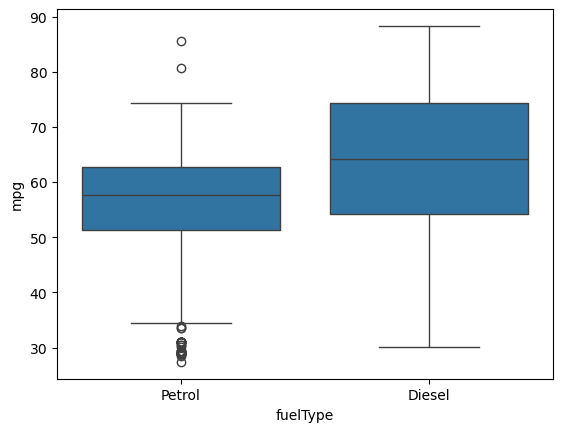

In [52]:
sns.boxplot(x = df['fuelType'], y = df['mpg']) # Checking where the outliers are
plt.show()

In [53]:
df = handle_outlier(df,'mpg') # Handling Outliers

*Plot after handling outliers*

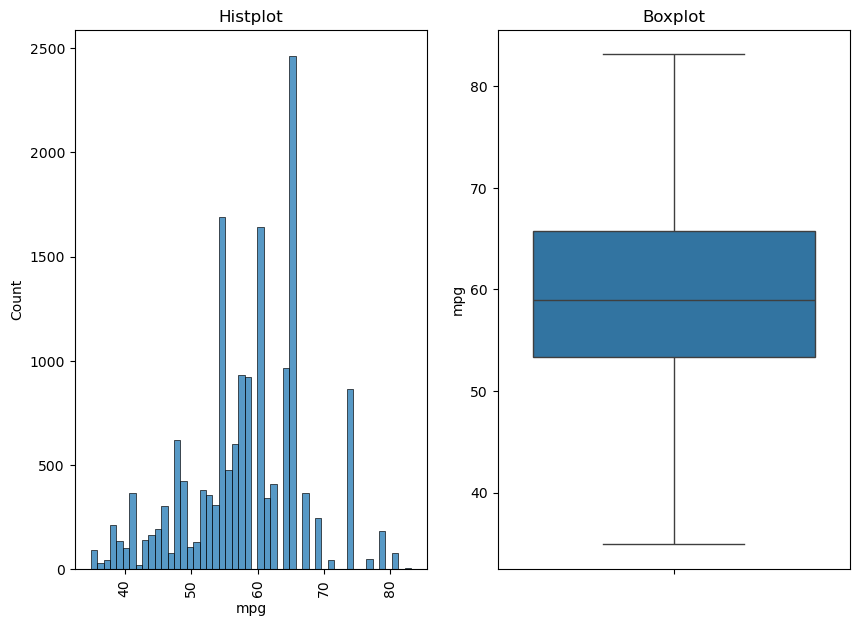

In [55]:
plot_dist('mpg')

In [56]:
df['mpg'].skew() # Check skew of data

-0.16399812798304292

**Analyzing 'engineSize' column**

In [58]:
df['engineSize'].value_counts() # Counts for each value of engineSize column

engineSize
1.0    7622
1.5    3089
2.0    2838
1.2    1535
1.6     684
1.1     550
1.4      64
0.0      47
2.2       8
2.3       5
1.3       5
1.8       4
5.0       1
Name: count, dtype: int64

In [59]:
df['engineSize'] = df['engineSize'].apply(lambda x : 1.0 if x == 0 else x) # Filling '1' where the value is Zero

In [60]:
df = df[~(df['engineSize'].isin([5.0]))] # Remove the row where the enginesize is 5

**Analyzing all columns**

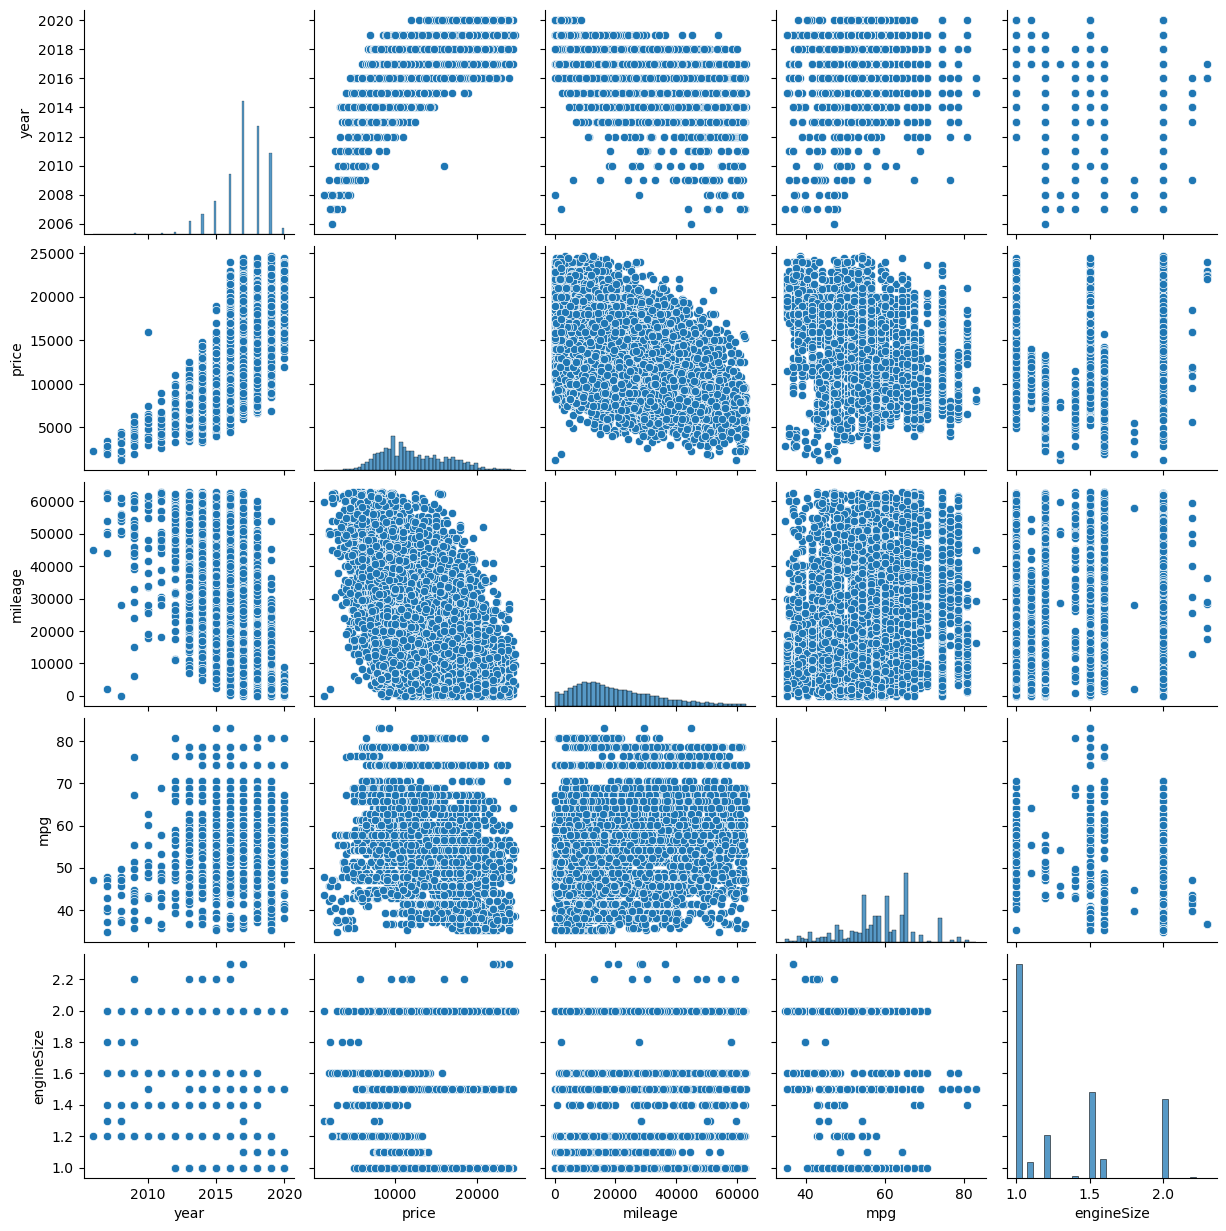

In [62]:
sns.pairplot(df)
plt.show()

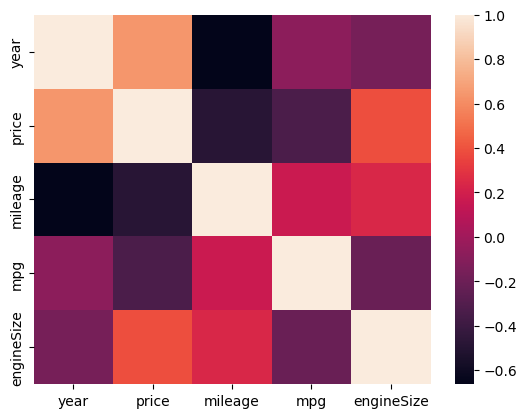

In [63]:
sns.heatmap(df.corr(numeric_only = True))
plt.show()

**From Heatmap we can say that**<br>
* year and Engine size have positive correlation with price column<br>
* mileage has negative correlation with price column

In [65]:
# df.to_csv('final_car_data.csv') 

In [66]:
x = df.drop(columns = ['price']) # x have input features and y have target feature
y = df['price']

In [67]:
#Importing necessary libraries for preprocessing, model building, and evaluation

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,accuracy_score

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5) # Split data 80:20 (train:test)

In [69]:
x_train.head()

,model,year,transmission,mileage,fuelType,mpg,engineSize
5898,Edge,2017,Manual,22168,Diesel,48.7,2.0
5238,Focus,2014,Manual,44117,Petrol,61.4,1.0
13363,C-MAX,2016,Manual,18978,Diesel,68.9,1.5
15223,Focus,2019,Manual,12030,Petrol,60.1,1.0
16457,Mondeo,2011,Manual,60000,Petrol,35.8,2.0


In [70]:
# Initializing scaler, encoder, and regression models

scaler = StandardScaler()
ohe = OneHotEncoder()
lr = LinearRegression()
lasso = Lasso()

In [71]:
ohe.fit(x[['model','transmission','fuelType','year']]) # Fitting OneHotEncoder to the selected columns

OneHotEncoder()

In [72]:
ohe.categories_   # Display all categories

[array(['B-MAX', 'C-MAX', 'EcoSport', 'Edge', 'Fiesta', 'Focus', 'Fusion',
        'Galaxy', 'Grand C-MAX', 'Grand Tourneo Connect', 'KA', 'Ka+',
        'Kuga', 'Mondeo', 'Puma', 'S-MAX', 'Tourneo Connect',
        'Tourneo Custom'], dtype=object),
 array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object),
 array(['Diesel', 'Petrol'], dtype=object),
 array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
        2017, 2018, 2019, 2020], dtype=int64)]

In [73]:
# Creating a ColumnTransformer to apply OneHotEncoding to categorical features and scaling to numerical features

trf1 = ColumnTransformer([
    ('ohe',OneHotEncoder(categories=ohe.categories_,handle_unknown='ignore'),['model','transmission','fuelType','year']),
    ('scale',scaler,['mileage','mpg','engineSize'])
],remainder= 'passthrough')

In [74]:
trf1.fit_transform(x_train) # Fitting the Data to check where the columnTransformer works well or not
trf1.get_feature_names_out()

array(['ohe__model_B-MAX', 'ohe__model_C-MAX', 'ohe__model_EcoSport',
       'ohe__model_Edge', 'ohe__model_Fiesta', 'ohe__model_Focus',
       'ohe__model_Fusion', 'ohe__model_Galaxy', 'ohe__model_Grand C-MAX',
       'ohe__model_Grand Tourneo Connect', 'ohe__model_KA',
       'ohe__model_Ka+', 'ohe__model_Kuga', 'ohe__model_Mondeo',
       'ohe__model_Puma', 'ohe__model_S-MAX',
       'ohe__model_Tourneo Connect', 'ohe__model_Tourneo Custom',
       'ohe__transmission_Automatic', 'ohe__transmission_Manual',
       'ohe__transmission_Semi-Auto', 'ohe__fuelType_Diesel',
       'ohe__fuelType_Petrol', 'ohe__year_2006', 'ohe__year_2007',
       'ohe__year_2008', 'ohe__year_2009', 'ohe__year_2010',
       'ohe__year_2011', 'ohe__year_2012', 'ohe__year_2013',
       'ohe__year_2014', 'ohe__year_2015', 'ohe__year_2016',
       'ohe__year_2017', 'ohe__year_2018', 'ohe__year_2019',
       'ohe__year_2020', 'scale__mileage', 'scale__mpg',
       'scale__engineSize'], dtype=object)

**Using Linear Regression**

In [76]:
# Building a pipeline with transformer and linear regression model

pipe = Pipeline([
    ('trf1',trf1),
    ('lr',lr)
])

In [77]:
pipe.fit(x_train,y_train)    # Fitting the pipeline on training data

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories=[array(['B-MAX', 'C-MAX', 'EcoSport', 'Edge', 'Fiesta', 'Focus', 'Fusion',
       'Galaxy', 'Grand C-MAX', 'Grand Tourneo Connect', 'KA', 'Ka+',
       'Kuga', 'Mondeo', 'Puma', 'S-MAX', 'Tourneo Connect',
       'Tourneo Custom'], dtype=object),
                                                                            array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object),
                                                                            array(['Diesel', 'Petrol'], dtype=object),
                                                                            array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020], dtype=int64)],
                                                                handle_unknown='ignore'),
                                                  ['model', 'transmission',
                                                   'fuelType', 'year']),
                                                 ('scale', StandardScaler(),
                                                  ['mileage', 'mpg',
                                                   'engineSize'])])),
                ('lr', LinearRegression())])

In [78]:
# Predicting target values on test and training data

y_pred = pipe.predict(x_test)
y_train_pred = pipe.predict(x_train)
print(f"R2 value for test data :",r2_score(y_test,y_pred))
print(f"R2 value for train data :",r2_score(y_train,y_train_pred))

R2 value for test data : 0.8740031283036495
R2 value for train data : 0.866156492116876


**Using Ridge Regressor**

In [80]:
ridge = Ridge(alpha = 1)
pipe2 = Pipeline([
    ('trf1',trf1),
    ('lr',ridge)
])
pipe2.fit(x_train,y_train)
y_pred2 = pipe2.predict(x_test)
y_train_pred2 = pipe.predict(x_train)
print(f"R2 value for test data :",r2_score(y_test,y_pred2))
print(f"R2 value for train data :",r2_score(y_train,y_train_pred2))

R2 value for test data : 0.8740223690310297
R2 value for train data : 0.866156492116876


**Using Lasso Regressor**

In [83]:
pipe3 = Pipeline([
    ('trf1',trf1),
    ('lr',lasso)
])
pipe3.fit(x_train,y_train)
y_pred3 = pipe3.predict(x_test)
y_train_pred3 = pipe.predict(x_train)
print(f"R2 value for test data :",r2_score(y_test,y_pred3))
print(f"R2 value for train data :",r2_score(y_train,y_train_pred3))

R2 value for test data : 0.8735300727182785
R2 value for train data : 0.866156492116876


C:\Users\Samundra\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151754075.90974045, tolerance: 20957331.834857024
  model = cd_fast.sparse_enet_coordinate_descent(


**From the above we can conclude that all model give almost same result on both train and test data**

In [86]:
import pickle # Importing Pickle

In [88]:
with open('linearRegModel.pkl', 'wb') as f:
    pickle.dump(pipe, f)

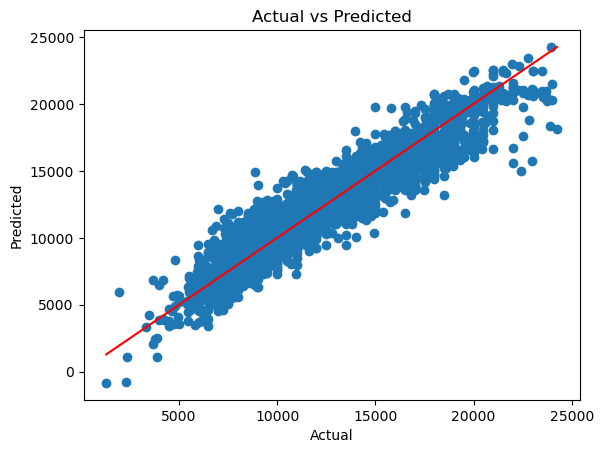

In [90]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r')  # ideal line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()